# Linear Regression Playground
Some experiments with the Linear Regression model to get a better intuition about it.

## Libraries

In [1]:
import json
import datetime as dt
import pathlib
import pprint

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

Sklearn Linear model docs:

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

My DS libraries course project notebook - helping with how to use certain methods:

https://github.com/shatandv/GB_Python_DS_Libs_Contd_2020_09_17/blob/lesson4/course_project/AShataev_solution.ipynb

## Paths

In [2]:
CWD = pathlib.Path('.')
DATA_DIR = CWD / 'data'
US_DATA_PATH = DATA_DIR / 'USvideos.csv'
US_CATS_PATH = DATA_DIR / 'US_category_id.json'

## Let's read some data

Read CSV file -> DF:

In [3]:
df = pd.read_csv(US_DATA_PATH, delimiter=',')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [5]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [6]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


Read JSON:

In [7]:
with open(US_CATS_PATH, 'r', encoding='utf-8') as file:
    categories = json.loads(file.read())

In [8]:
pp = pprint.PrettyPrinter(indent=2)
# pp.pprint(categories)

Let's add a 'category' column with the name of a category.

In [9]:
cat_id_name = {int(item['id']): item['snippet']['title'] for item in categories['items']}
# pp.pprint(cat_id_name)

In [10]:
df['category'] = df['category_id'].apply(lambda x: cat_id_name[x])

## Pick out features

Let's pick out only numerical, date and bool features:
- trending_date,
- publish_time,
- category_id,
- views,
- likes,
- dislikes,
- comment_count,
- comments_disabled,
- ratings_disabled,
- video_error_or_removed

In [11]:
num_features = ['trending_date', 'publish_time', 'category_id', 'views', 'likes', 'dislikes', 
                'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']
df = df[num_features]

## Cleaning data a bit

Convert category_id and boolean features to uint8:

In [12]:
df[[
    'category_id',
    'comments_disabled', 
    'ratings_disabled', 
    'video_error_or_removed'
]] = df[['category_id', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']].astype(np.uint8)

Convert trending_date, publish_time to datetime64[ns]:

In [13]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [14]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [15]:
df[['trending_date', 'publish_time']].head()

,trending_date,publish_time
0,2017-11-14,2017-11-13 17:13:01
1,2017-11-14,2017-11-13 07:30:00
2,2017-11-14,2017-11-12 19:05:24
3,2017-11-14,2017-11-13 11:00:04
4,2017-11-14,2017-11-12 18:01:41


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           40949 non-null  datetime64[ns]
 1   publish_time            40949 non-null  datetime64[ns]
 2   category_id             40949 non-null  uint8         
 3   views                   40949 non-null  int64         
 4   likes                   40949 non-null  int64         
 5   dislikes                40949 non-null  int64         
 6   comment_count           40949 non-null  int64         
 7   comments_disabled       40949 non-null  uint8         
 8   ratings_disabled        40949 non-null  uint8         
 9   video_error_or_removed  40949 non-null  uint8         
dtypes: datetime64[ns](2), int64(4), uint8(4)
memory usage: 2.0 MB


## Add some new features

Hour number of publish_time:

In [17]:
df['publish_hour'] = df['publish_time'].dt.hour

Age of the video in days:

In [18]:
df['video_age_days'] = (dt.datetime.now() - df['publish_time']).dt.days.astype(np.int64)

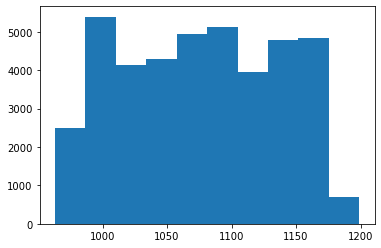

In [19]:
plt.hist(df.loc[df['video_age_days'] < 1200, 'video_age_days'])
plt.show()

Like/Dislike Ratio = likes / dislikes:

In [20]:
df['like_dislike_ratio'] = df['likes'] / df['dislikes']

Replace the like_dislike_ratio 'inf' values with 10000 - a big value:

In [21]:
df.loc[df['like_dislike_ratio'] >= df['like_dislike_ratio'].quantile(0.994), 'like_dislike_ratio'].value_counts()

inf            213
1438.750000      1
553.000000       1
510.000000       1
533.921053       1
552.000000       1
667.285714       1
587.000000       1
1493.750000      1
532.000000       1
533.642857       1
615.354167       1
448.166667       1
1404.500000      1
440.412371       1
713.555556       1
453.750000       1
657.333333       1
508.750000       1
1468.750000      1
1737.333333      1
843.200000       1
454.038514       1
495.333333       1
732.947368       1
436.031102       1
525.500000       1
506.257299       1
437.000000       1
725.175000       1
538.000000       1
1363.750000      1
489.750000       1
Name: like_dislike_ratio, dtype: int64

In [22]:
df['like_dislike_ratio'] = df['like_dislike_ratio'].replace(np.inf, 2000)

Look at data:

In [23]:
df.describe()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour,video_age_days,like_dislike_ratio
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04,40949.000000,40949.000000,40949.000000,40949.000000,40949.000000,40779.000000
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03,0.015458,0.004127,0.000562,13.766685,1086.600869,54.185345
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04,0.123368,0.064110,0.023693,6.424996,161.677963,150.026073
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,963.000000,0.000000
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02,0.000000,0.000000,0.000000,10.000000,1022.000000,13.353674
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03,0.000000,0.000000,0.000000,15.000000,1076.000000,29.291667
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03,0.000000,0.000000,0.000000,18.000000,1132.000000,57.105736
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06,1.000000,1.000000,1.000000,23.000000,5307.000000,2000.000000


## Let's predict comment_count

Comment count is a good predictor of engagement.

In [24]:
df.columns

Index(['trending_date', 'publish_time', 'category_id', 'views', 'likes',
       'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'publish_hour', 'video_age_days',
       'like_dislike_ratio'],
      dtype='object')

In [25]:
df = df.sort_values(['trending_date', 'publish_time'], axis=0)

In [26]:
df.head()

,trending_date,publish_time,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,publish_hour,video_age_days,like_dislike_ratio
139,2017-11-14,2011-03-27 04:31:25,24,95085,909,52,193,0,0,0,4,3599,17.480769
29,2017-11-14,2011-05-29 17:03:12,1,50867,715,238,246,0,0,0,17,3536,3.004202
155,2017-11-14,2012-06-10 19:24:38,27,6412,49,0,2,0,0,0,19,3158,2000.000000
135,2017-11-14,2015-05-21 07:55:00,24,192609,1345,24,126,0,0,0,7,2083,56.041667
160,2017-11-14,2017-03-31 21:46:53,27,773,2,0,0,0,0,0,21,1403,2000.000000
